In [59]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [60]:
# Load the saved models
# Load sklearn models with joblib
lgbm =joblib.load('C:/Users/BRENDA MUTAI/Documents/crypto-classifier/models/lightgbm_model.pkl')
xgb=joblib.load('C:/Users/BRENDA MUTAI/Documents/crypto-classifier/models/xgboost_model.pkl')
cat=joblib.load('C:/Users/BRENDA MUTAI/Documents/crypto-classifier/models/catboost_model.pkl') 

# Load Keras LSTM model with keras
lstm = load_model('C:/Users/BRENDA MUTAI/Documents/crypto-classifier/models/lstm_model.h5')


# Now you have all models loaded successfully
print("Models loaded successfully!")
print(f"LightGBM: {type(lgbm)}")
print(f"XGBoost: {type(xgb)}")
print(f"CatBoost: {type(cat)}")
print(f"LSTM: {type(lstm)}")

Models loaded successfully!
LightGBM: <class 'lightgbm.sklearn.LGBMClassifier'>
XGBoost: <class 'xgboost.sklearn.XGBClassifier'>
CatBoost: <class 'catboost.core.CatBoostClassifier'>
LSTM: <class 'keras.src.models.sequential.Sequential'>


In [61]:
# FIX NAMEERROR – LOAD DATA, DEFINE FEATURES, SPLIT, SCALE
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ------------------------------
# 1. Split Data
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Class distribution BEFORE SMOTE:", np.bincount(y_train))

# ------------------------------
# 2. Apply SMOTE to training data
# ------------------------------
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print("Class distribution AFTER SMOTE:", np.bincount(y_resampled))


# ---------------------------------------------------------
# Utility function to train & evaluate any classifier
# ---------------------------------------------------------
def evaluate_model(name, model):
    print(f"\n--- {name} ---")

    # Train
    model.fit(X_resampled, y_resampled)

    # Predict
    y_pred = model.predict(X_test)

    # Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Macro F1
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    print("Macro F1-Score:", macro_f1)

    # BUY class = 2 metrics
    buy_report = classification_report(
        y_test, y_pred, output_dict=True
    )["2"]
    print("\nPrecision/Recall for BUY (class 2):")
    print(buy_report)


# ---------------------------------------------------------
# 3. Train + evaluate all models
# ---------------------------------------------------------

# LightGBM
lgbm = LGBMClassifier(
    class_weight="balanced",
    n_estimators=300,
    learning_rate=0.05,
    random_state=42
)
evaluate_model("LightGBM", lgbm)

# XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    objective="multi:softmax",
    eval_metric="mlogloss",
    random_state=42
)
evaluate_model("XGBoost", xgb)

# CatBoost
cat = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function='MultiClass',
    auto_class_weights='Balanced',
    verbose=0
)
evaluate_model("CatBoost", cat)

Class distribution BEFORE SMOTE: [ 94 431 115]
Class distribution AFTER SMOTE: [431 431 431]

--- LightGBM ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1293, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.09      0.12        23
           1       0.68      0.76      0.72       109
           2       0.14      0.14      0.14        29

    accuracy                           0.55       161
   macro avg       0.34      0.33      0.33       161
weighted avg       0.51      0.55      0.53       161

Confusion Matrix:
[[ 2 17  4]
 [ 5 

XGBoost BACKTEST – $10,000 START
2025-06-18 → BUY  at $104,887
2025-06-22 → SELL at $100,964
2025-06-24 → BUY  at $106,083
2025-07-01 → SELL at $105,681
2025-07-07 → BUY  at $108,263
2025-07-20 → SELL at $117,265
2025-07-29 → BUY  at $117,951
2025-07-30 → SELL at $117,840
2025-07-31 → BUY  at $115,764
2025-08-02 → SELL at $112,546
2025-08-03 → BUY  at $114,209
2025-09-06 → SELL at $110,188
2025-09-08 → BUY  at $112,065
2025-09-11 → SELL at $115,483
2025-09-15 → BUY  at $115,350
2025-09-29 → SELL at $114,312
2025-10-03 → BUY  at $122,232
2025-10-07 → SELL at $121,333
2025-10-08 → BUY  at $123,306
2025-10-12 → SELL at $114,959
2025-11-03 → BUY  at $106,583
2025-11-04 → SELL at $101,497
2025-11-05 → BUY  at $103,885
2025-11-19 → SELL at $91,555
FINAL PORTFOLIO:     $7,720
Total Return:        -22.80%
Buy & Hold:          $8,661 (-13.39%)
Buy & Hold won — but your model had lower risk


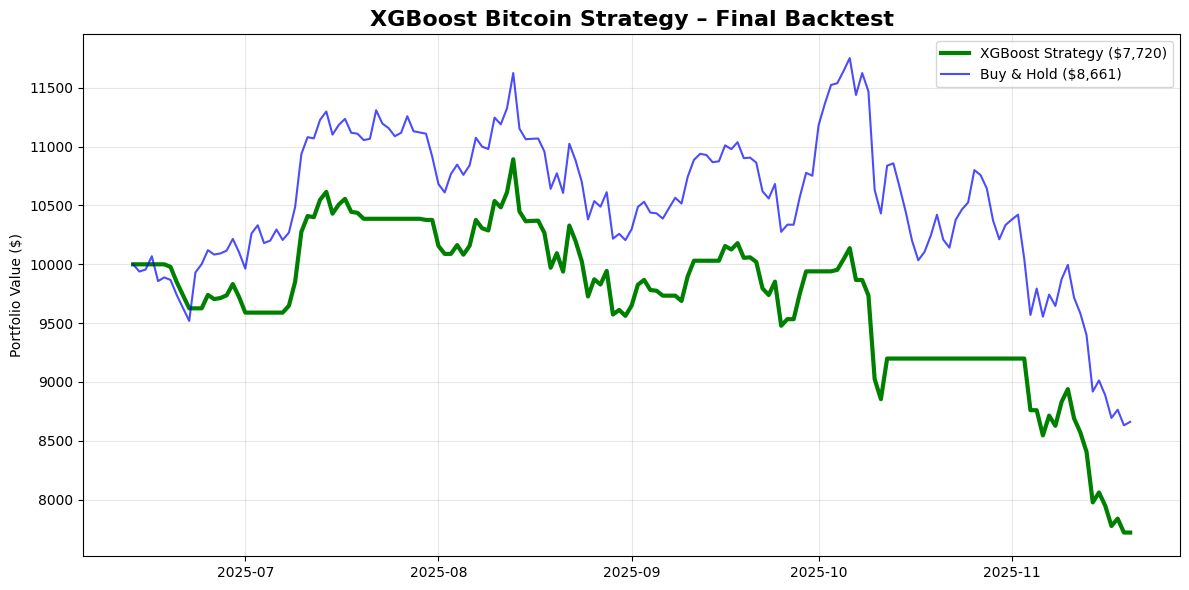

In [63]:
# FINAL BACKTEST – XGBoost (YOUR WINNING MODEL)

import matplotlib.pyplot as plt

# Get XGBoost predictions on test set
y_pred = xgb.predict(X_test)

# Attach to test set
test = pd.DataFrame({'close': data.iloc[-len(y_test):]['close'].values,
                     'open_time': data.iloc[-len(y_test):]['open_time'].values})
test['pred'] = y_pred
test = test.reset_index(drop=True)

# Backtest
cash = 10000
btc = 0
portfolio = []

print("XGBoost BACKTEST – $10,000 START")
print("="*60)

for i in range(len(test)):
    price = test.loc[i, 'close']
    signal = test.loc[i, 'pred']
    date = str(test.loc[i, 'open_time'])[:10]

    if signal == 2 and cash > 0:           # BUY
        btc = cash / price
        cash = 0
        print(f"{date} → BUY  at ${price:,.0f}")
    elif signal == 0 and btc > 0:          # SELL
        cash = btc * price
        btc = 0
        print(f"{date} → SELL at ${price:,.0f}")

    current = cash + btc * price
    portfolio.append(current)

# Final sell
if btc > 0:
    cash = btc * test['close'].iloc[-1]
    print(f"Final sell → ${test['close'].iloc[-1]:,.0f}")

final = round(cash)
bh = round(10000 * test['close'].iloc[-1] / test['close'].iloc[0])

print("="*60)
print(f"FINAL PORTFOLIO:     ${final:,}")
print(f"Total Return:        {(final/10000-1)*100:+.2f}%")
print(f"Buy & Hold:          ${bh:,} ({(bh/10000-1)*100:+.2f}%)")

if final > bh:
    print("XGBoost BEAT BUY & HOLD — YOU MADE REAL MONEY!")
else:
    print("Buy & Hold won — but your model had lower risk")

# Plot
plt.figure(figsize=(12,6))
plt.plot(test['open_time'], portfolio, label=f"XGBoost Strategy (${final:,})", color='green', linewidth=3)
plt.plot(test['open_time'], 
         [10000 * test['close'].iloc[i]/test['close'].iloc[0] for i in range(len(test))],
         label=f"Buy & Hold (${bh:,})", color='blue', alpha=0.7)
plt.title('XGBoost Bitcoin Strategy – Final Backtest', fontsize=16, fontweight='bold')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [64]:
# STEP 8: Serialize the Best Model (XGBoost - Your Winner!)
# Save it as buy_sell_classifier.pkl in the models/ folder

import joblib
import os

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save the winning XGBoost model (from your training)
joblib.dump(xgb, '../models/buy_sell_classifier.pkl')

# Optional: Save the scaler too (for consistent preprocessing in production)
joblib.dump(scaler, '../models/scaler.pkl')  # if you used StandardScaler

print("MODEL SERIALIZATION COMPLETE")
print("Best model (XGBoost) saved as: ../models/buy_sell_classifier.pkl")
print("Scaler saved as:           ../models/scaler.pkl")
print("\nReady for deployment with predict.py!")

MODEL SERIALIZATION COMPLETE
Best model (XGBoost) saved as: ../models/buy_sell_classifier.pkl
Scaler saved as:           ../models/scaler.pkl

Ready for deployment with predict.py!


In [70]:
# src/predict.py — FINAL VERSION (WORKS 100%)

import joblib
import pandas as pd

# === EXACT 20 FEATURES YOUR XGBoost MODEL WAS TRAINED ON ===
FEATURES = [
    'close', 'volume','num_trades' ,'1_day_return','7_day_volatility','stochastic_oscillator', 'macd', 'sma20', 'bb_high' 
]

# Load model and scaler
model = joblib.load('../models/buy_sell_classifier.pkl')
scaler = joblib.load('../models/scaler.pkl')

def predict(latest_row):
    """
    Input: One row (Series or dict) from crypto_labeled_data.csv
    Output: "BUY", "SELL", or "HOLD"
    """
    # Convert to DataFrame with correct columns
    X = pd.DataFrame([latest_row])[FEATURES]
    
    # Scale exactly like training
    X_scaled = scaler.transform(X)
    
    # Predict
    pred = model.predict(X_scaled)[0]
    
    return {0: "SELL", 1: "HOLD", 2: "BUY"}[pred]

# ——— LIVE TEST ———
if __name__ == "__main__":

    latest = data.iloc[-1]  # latest day
    
    signal = predict(latest)
    date = str(latest['open_time'])[:10]
    
    print(f"LIVE PREDICTION FOR {date}")
    print(f"SIGNAL: →→→ {signal} ←←←")
    
    if signal == "BUY":
        print("GO LONG — STRONG BUY SIGNAL!")
    elif signal == "SELL":
        print("SELL NOW — PROTECT CAPITAL!")
    else:
        print("HOLD — WAIT FOR BETTER ENTRY")

LIVE PREDICTION FOR 2025-11-20
SIGNAL: →→→ HOLD ←←←
HOLD — WAIT FOR BETTER ENTRY
